### Cryptocurrencies prices prediction

#### Life cycle of Machine Learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- Volatility among cryptocurrencies make most of them hard to use as an instrument capable of storing value. This project aims to understand and anticipate the daily market fluctuations.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/svaningelgem/crypto-currencies-daily-prices/data
- The data consists of 116 .csv files.

### 2.1 Import Data and Required Packages
#### Import Required Libraries

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub as kh
import ipywidgets as widgets
import matplotlib
import tqdm
import os

print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)
print("Seaborn version:", sns.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Kagglehub version:", kh.__version__)
print("ipywidgets version:", widgets.__version__)
print("tqdm version:", tqdm.__version__)

Pandas version: 2.0.3
Numpy version: 1.24.4
Seaborn version: 0.13.2
Matplotlib version: 3.7.5
Kagglehub version: 0.2.9
ipywidgets version: 8.1.5
tqdm version: 4.67.1


#### Import Data Set from Kaggle

In [30]:
path = kh.dataset_download("svaningelgem/crypto-currencies-daily-prices")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\gerar\.cache\kagglehub\datasets\svaningelgem\crypto-currencies-daily-prices\versions\593


#### List files in the directory

In [31]:
files = [f for f in os.listdir(path) if f.endswith('.csv')]
print("Files in the directory:", files)

Files in the directory: ['1INCH.csv', 'AAVE.csv', 'ACH.csv', 'ADA.csv', 'ALGO.csv', 'AMP.csv', 'ANKR.csv', 'APE.csv', 'AR.csv', 'ASTR.csv', 'ATOM.csv', 'AVAX.csv', 'AXS.csv', 'BAT.csv', 'BCH.csv', 'BNB.csv', 'BNX.csv', 'BSV.csv', 'BTC.csv', 'BTT.csv', 'CAKE.csv', 'CELO.csv', 'CFX.csv', 'CHZ.csv', 'CKB.csv', 'COMP.csv', 'CRO.csv', 'CRV.csv', 'CVX.csv', 'DAI.csv', 'DASH.csv', 'DCR.csv', 'DOGE.csv', 'DOT.csv', 'DYDX.csv', 'EGLD.csv', 'ELF.csv', 'ENS.csv', 'EOS.csv', 'ETC.csv', 'ETH.csv', 'FET.csv', 'FIL.csv', 'FLOW.csv', 'FTT.csv', 'GALA.csv', 'GLM.csv', 'GNO.csv', 'GRT.csv', 'GT.csv', 'HBAR.csv', 'HNT.csv', 'HOT.csv', 'ICP.csv', 'IMX.csv', 'INJ.csv', 'IOTA.csv', 'JST.csv', 'KAVA.csv', 'KCS.csv', 'KSM.csv', 'LDO.csv', 'LEO.csv', 'LINK.csv', 'LPT.csv', 'LTC.csv', 'MANA.csv', 'MATIC.csv', 'MINA.csv', 'MKR.csv', 'MX.csv', 'NEAR.csv', 'NEO.csv', 'NEXO.csv', 'NFT.csv', 'OKB.csv', 'ONE.csv', 'OSMO.csv', 'PAXG.csv', 'QNT.csv', 'QTUM.csv', 'RAY.csv', 'ROSE.csv', 'RSR.csv', 'RUNE.csv', 'SAND.csv',

#### Create a single Data Frame

In [34]:
df_list = []

for file in files:
    file_path = os.path.join(path, file)
    
    # Load the CSV, explicitly parse date column
    df = pd.read_csv(file_path, parse_dates=['date'], dtype={'ticker': 'category'})
    
    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True)

combined_df = combined_df.sort_values(by=['ticker', 'date'])

print(combined_df.info())  
combined_df.head()
combined_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216550 entries, 0 to 216549
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   ticker  216550 non-null  object        
 1   date    216550 non-null  datetime64[ns]
 2   open    216550 non-null  float64       
 3   high    216550 non-null  float64       
 4   low     216550 non-null  float64       
 5   close   216550 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 9.9+ MB
None


(216550, 6)

### 2.2 Dataset information

- ticker : name that represents the individual cryptocurrency
- date : how each cryptocurrency behaved by day
- open: price at which each cryptocurrency opened by day
- high: highest price for each cryptocurrency by day
- low: lowest price for each cryptocurrency by day
- close: price at which each cryptocurrency closed by day

### 3. Data Checks to perform

- Check missing values
- Check duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check for Outlier Detection

### 3.1 Check missing values

In [35]:
combined_df.isna().sum()

ticker    0
date      0
open      0
high      0
low       0
close     0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [36]:
combined_df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [38]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216550 entries, 0 to 216549
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   ticker  216550 non-null  object        
 1   date    216550 non-null  datetime64[ns]
 2   open    216550 non-null  float64       
 3   high    216550 non-null  float64       
 4   low     216550 non-null  float64       
 5   close   216550 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 9.9+ MB


### 3.4 Check the number of unique values of each column

In [39]:
combined_df.nunique()

ticker       116
date        5290
open      159323
high      159605
low       159062
close     159531
dtype: int64

### 3.5 Check statistics of data set

In [42]:
# Set display options to avoid scientific notation
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# Display the describe output again
print(combined_df.describe())

                                date          open          high  \
count                         216550 216550.000000 216550.000000   
mean   2021-12-08 01:49:54.009697280    422.048436    436.593037   
min              2010-07-17 00:00:00      0.000000      0.000000   
25%              2020-08-04 00:00:00      0.161671      0.169102   
50%              2022-06-20 00:00:00      1.302180      1.364190   
75%              2023-09-30 00:00:00     16.932825     17.690000   
max              2025-02-25 00:00:00 105118.000000 749251.000000   
std                              NaN   3924.515560   4326.806119   

                low         close  
count 216550.000000 216550.000000  
mean     410.872324    422.415496  
min        0.000000      0.000000  
25%        0.154000      0.161700  
50%        1.243940      1.302000  
75%       16.151450     16.940000  
max   103320.000000 105104.000000  
std     3831.201468   3928.288810  


### 3.6 Check for Outlier Detection

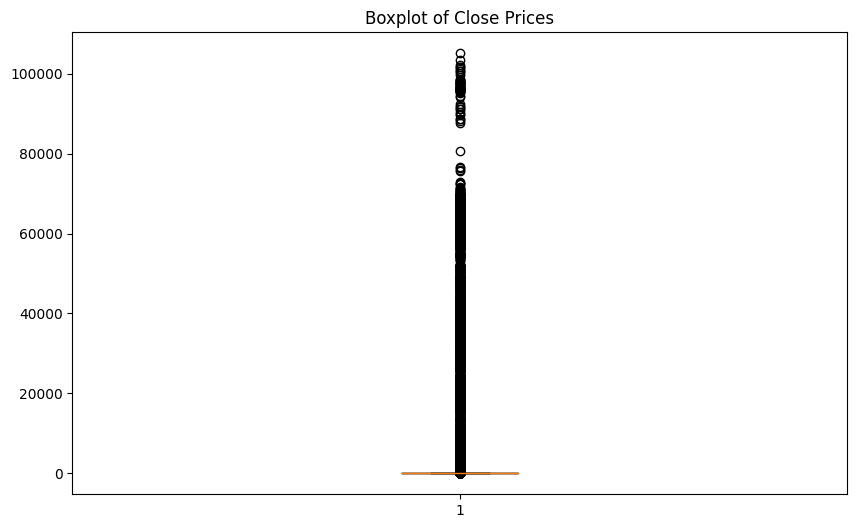

       ticker       date     open     high      low    close
3183      ACH 2022-11-09 0.010542 0.010766 0.009097 0.009178
3185      ACH 2022-11-11 0.010837 0.012242 0.009781 0.009973
3186      ACH 2022-11-12 0.009968 0.010150 0.009591 0.009639
3187      ACH 2022-11-13 0.009639 0.009754 0.009135 0.009388
3188      ACH 2022-11-14 0.009381 0.009383 0.008510 0.009027
...       ...        ...      ...      ...      ...      ...
213853    ZIL 2020-05-12 0.006951 0.007702 0.006836 0.007439
213854    ZIL 2020-05-13 0.007451 0.011500 0.007451 0.009100
213860    ZIL 2020-05-19 0.010100 0.010400 0.009400 0.009700
213861    ZIL 2020-05-20 0.009700 0.010200 0.009500 0.009646
213862    ZIL 2020-05-21 0.009645 0.010190 0.008497 0.009895

[19862 rows x 6 columns]
      ticker       date          open          high           low  \
37726    BTC 2024-12-06  96789.000000 102079.000000  95560.600000   
37728    BTC 2024-12-08  99717.700000 100548.000000  98767.200000   
37730    BTC 2025-01-27 104284.0000

In [43]:
# Check for outliers in the 'close' price
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot(combined_df['close'])
plt.title('Boxplot of Close Prices')
plt.show()

# Investigate the very small and very large values
print(combined_df[combined_df['close'] < 0.01])
print(combined_df[combined_df['close'] > 100000])

#### Insights from data checks

- We can conclude that the combined dataset is consistent with the original file from kaggle, which contains 116 csv files.
- We have no missing values nor duplicates
- Datatype for each column is consistent
- Statistics and outlier detection of the combined dataframe indicate that the data is valid

### 4. Exploratory Data Analysis

#### Plot closing prices overtime

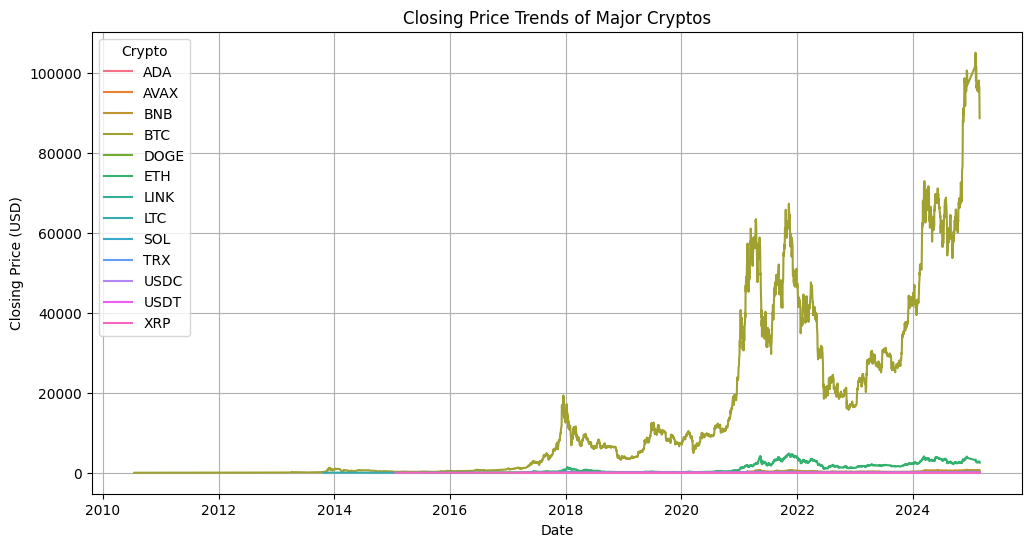

In [45]:
# Select major cryptos for visualization
major_cryptos = ['BTC', 'ETH', 'USDT', 'XRP', 'BNB', 'SOL', 'USDC', 'DOGE', 'ADA', 'TRX', 'LINK', 'LTC', 'AVAX', 'SUI']
df_major = combined_df[combined_df['ticker'].isin(major_cryptos)]

# Plot price trends
plt.figure(figsize=(12,6))
sns.lineplot(data=df_major, x='date', y='close', hue='ticker')
plt.title('Closing Price Trends of Major Cryptos')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend(title='Crypto')
plt.grid(True)
plt.show()

#### Normalize closing prices

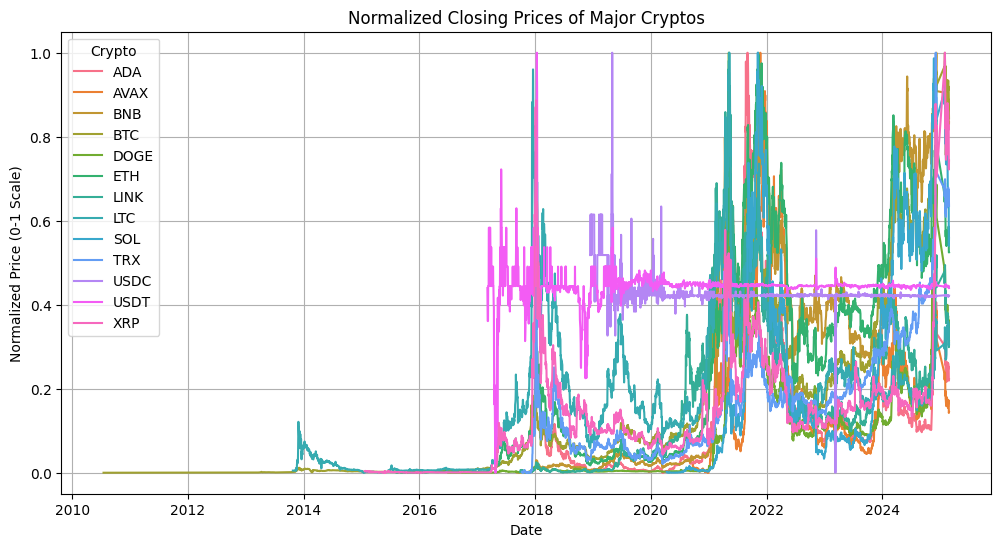

In [46]:
# Normalize prices using Min-Max Scaling (0-1 range)
def normalize_prices(df):
    df_norm = df.copy()
    df_norm['close'] = (df_norm['close'] - df_norm['close'].min()) / (df_norm['close'].max() - df_norm['close'].min())
    return df_norm

# Apply normalization per token
df_normalized = df_major.groupby('ticker', group_keys=False).apply(normalize_prices)

# Plot again with normalized prices
plt.figure(figsize=(12,6))
sns.lineplot(data=df_normalized, x='date', y='close', hue='ticker')
plt.title('Normalized Closing Prices of Major Cryptos')
plt.xlabel('Date')
plt.ylabel('Normalized Price (0-1 Scale)')
plt.legend(title='Crypto')
plt.grid(True)
plt.show()

#### Pearson Correlation Matrix

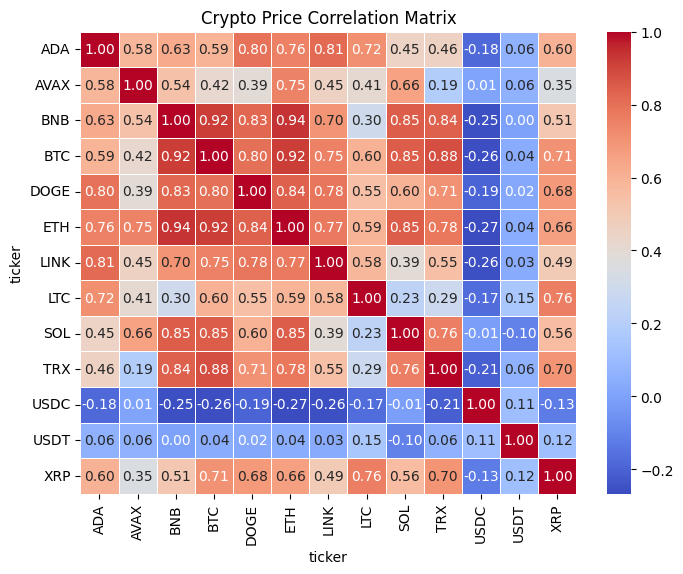

In [51]:
# Pivot table so each crypto has its own column
df_pivot = df_major.pivot(index='date', columns='ticker', values='close')

# Compute correlation matrix
correlation_matrix = df_pivot.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Crypto Price Correlation Matrix')
plt.show()

####  Price Movements & Volatility

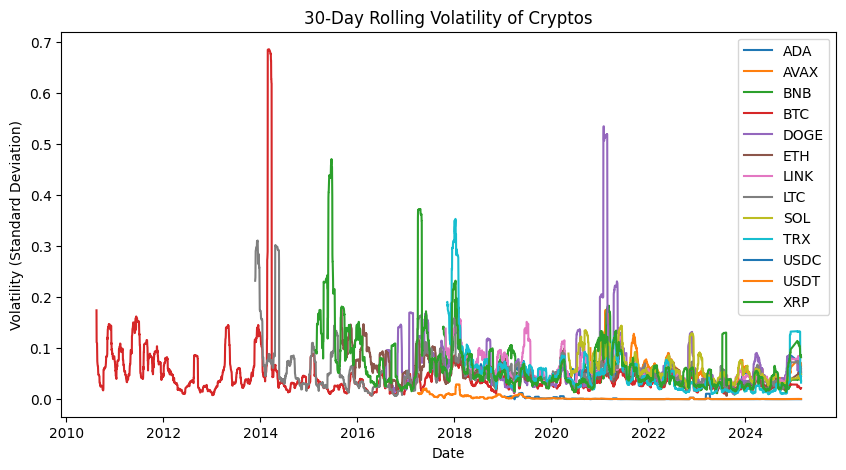

In [52]:
# Compute daily returns
df_returns = df_pivot.pct_change()

# Compute rolling volatility (30-day window)
rolling_volatility = df_returns.rolling(window=30).std()

# Plot volatility
plt.figure(figsize=(10,5))
for ticker in df_returns.columns:
    plt.plot(rolling_volatility.index, rolling_volatility[ticker], label=ticker)

plt.legend()
plt.title("30-Day Rolling Volatility of Cryptos")
plt.xlabel("Date")
plt.ylabel("Volatility (Standard Deviation)")
plt.show()

#### Insights
 - Nornmalized closing prices indicate that the market might move similarly across currencies
 - Pearson matrix indicate ETH/BNB have the strongest correlation
 - Major cryptos, leaving extraordinary events aside, flucltuate similarly